<a href="https://colab.research.google.com/github/pragmatic-philosopher09/Audio-Emotion-Analyzer-Through-Deep-Learning/blob/main/Phase_4_LSTM_Model_Concoction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import sys
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import keras
#from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Features = pd.read_csv('/content/drive/MyDrive/features_dataset.csv')
Features.head()
# Features.shape


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,152,153,154,155,156,157,158,159,160,labels
0,0,0.272267,0.689451,0.708028,0.666473,0.715468,0.694820,0.627661,0.632560,0.687715,...,0.000687,0.000502,0.000372,0.000197,0.000137,0.000288,0.000349,0.000143,1.498768e-05,angry
1,1,0.262035,0.603476,0.668302,0.692199,0.709884,0.658301,0.605176,0.609343,0.640842,...,0.000009,0.000012,0.000028,0.000034,0.000036,0.000035,0.000032,0.000011,8.432723e-07,calm
2,2,0.195466,0.628032,0.687169,0.651985,0.621273,0.604192,0.640623,0.626136,0.652430,...,0.000086,0.000107,0.000061,0.000052,0.000059,0.000095,0.000090,0.000031,2.326331e-06,sad
3,3,0.173769,0.720864,0.685492,0.655122,0.652557,0.587786,0.550012,0.638170,0.707171,...,0.000064,0.000051,0.000074,0.000129,0.000198,0.000243,0.000190,0.000074,4.691918e-06,fear
4,4,0.207284,0.692981,0.737456,0.726056,0.685032,0.636497,0.568223,0.528898,0.598124,...,0.000018,0.000014,0.000014,0.000005,0.000007,0.000011,0.000016,0.000008,4.218449e-07,sad


In [ ]:
from sklearn.utils import shuffle
temp = shuffle(Features)
# temp[:10]


df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df] # 1 - train basically


trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(X_train, axis=2)
x_test = np.expand_dims(X_test, axis=2)


In [ ]:
print('Train dimension:')
print(x_train.shape)
print('Test dimension:')
print(x_test.shape)

print('Train labels dimension:')
print(y_train.shape)
print('Test labels dimension:')
print(y_test.shape)


Train dimension:
(1143, 162, 1)
Test dimension:
(297, 162, 1)
Train labels dimension:
(1143, 8)
Test labels dimension:
(297, 8)


In [ ]:
# LSTM Classifier
import keras
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2

from tensorflow.keras import layers,regularizers,models
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

In [ ]:
model = Sequential()
model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))

model.add(LSTM(64, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))

model.add(LSTM(64, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Flatten())

# model.add(Dense(32))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('softmax'))


# model = Sequential()
# model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=True))
# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(32))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('softmax'))


# model = models.Sequential([
#         layers.BatchNormalization(input_shape=(x_train.shape[1], 1)),
#         layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
#         layers.Dropout(0.2),
#         layers.BatchNormalization(),
#         layers.Dense(8,activation='softmax'),
# ])

#opt = keras.optimizers.Adam(learning_rate=0.00001)
# Configures the model for training
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 162, 1)           4         
 hNormalization)                                                 
                                                                 
 lstm_3 (LSTM)               (None, 162, 256)          264192    
                                                                 
 lstm_4 (LSTM)               (None, 162, 64)           82176     
                                                                 
 lstm_5 (LSTM)               (None, 162, 64)           33024     
                                                                 
 batch_normalization_3 (Batc  (None, 162, 64)          256       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 10368)            

In [ ]:
# Training the model
history=model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=(x_test, y_test), shuffle=True)


Epoch 1/500
18/18 [==============================] - 8s 136ms/step - loss: 2.0928 - accuracy: 0.1654 - val_loss: 2.0621 - val_accuracy: 0.1751
Epoch 2/500
18/18 [==============================] - 1s 41ms/step - loss: 1.9784 - accuracy: 0.2266 - val_loss: 2.0750 - val_accuracy: 0.1582
Epoch 3/500
18/18 [==============================] - 1s 31ms/step - loss: 1.8888 - accuracy: 0.2528 - val_loss: 2.0501 - val_accuracy: 0.2088
Epoch 4/500
18/18 [==============================] - 1s 29ms/step - loss: 1.8411 - accuracy: 0.2861 - val_loss: 2.0730 - val_accuracy: 0.1582
Epoch 5/500
18/18 [==============================] - 1s 30ms/step - loss: 1.8388 - accuracy: 0.2756 - val_loss: 2.0662 - val_accuracy: 0.1650
Epoch 6/500
18/18 [==============================] - 1s 30ms/step - loss: 1.8045 - accuracy: 0.3071 - val_loss: 2.0388 - val_accuracy: 0.2088
Epoch 7/500
18/18 [==============================] - 1s 30ms/step - loss: 1.7926 - accuracy: 0.2931 - val_loss: 2.1391 - val_accuracy: 0.1279
Epoch

10/10 [==============================] - 0s 19ms/step - loss: 2.9907 - accuracy: 0.6599
Accuracy of our model on test data :  65.99326729774475 %


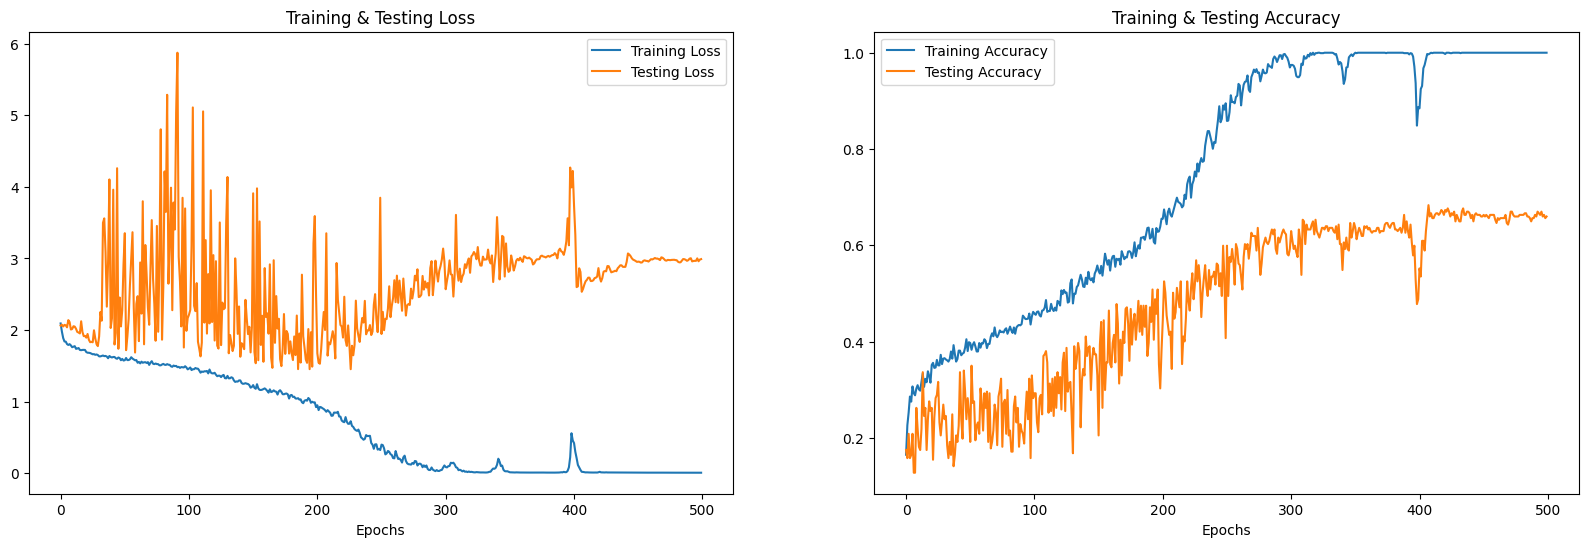

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model.save('LSTM.h5')

## **Evaluation Metrics**

### ***Confusion Matrix***

<Axes: >

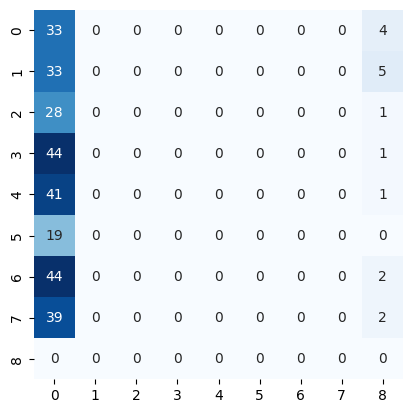

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert y_test to one-dimensional array of label indices
y_test_indices = np.argmax(y_test, axis=1)

# Convert x_test_cnn to one-dimensional array of label indices
x_test_indices = np.argmax(x_test, axis=1)

# Calculate confusion matrix
conf_mat = confusion_matrix(y_test_indices, x_test_indices)

# Visualize confusion matrix as heatmap
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

#### Multiclass Classification Version:

10/10 [==============================] - 2s 19ms/step


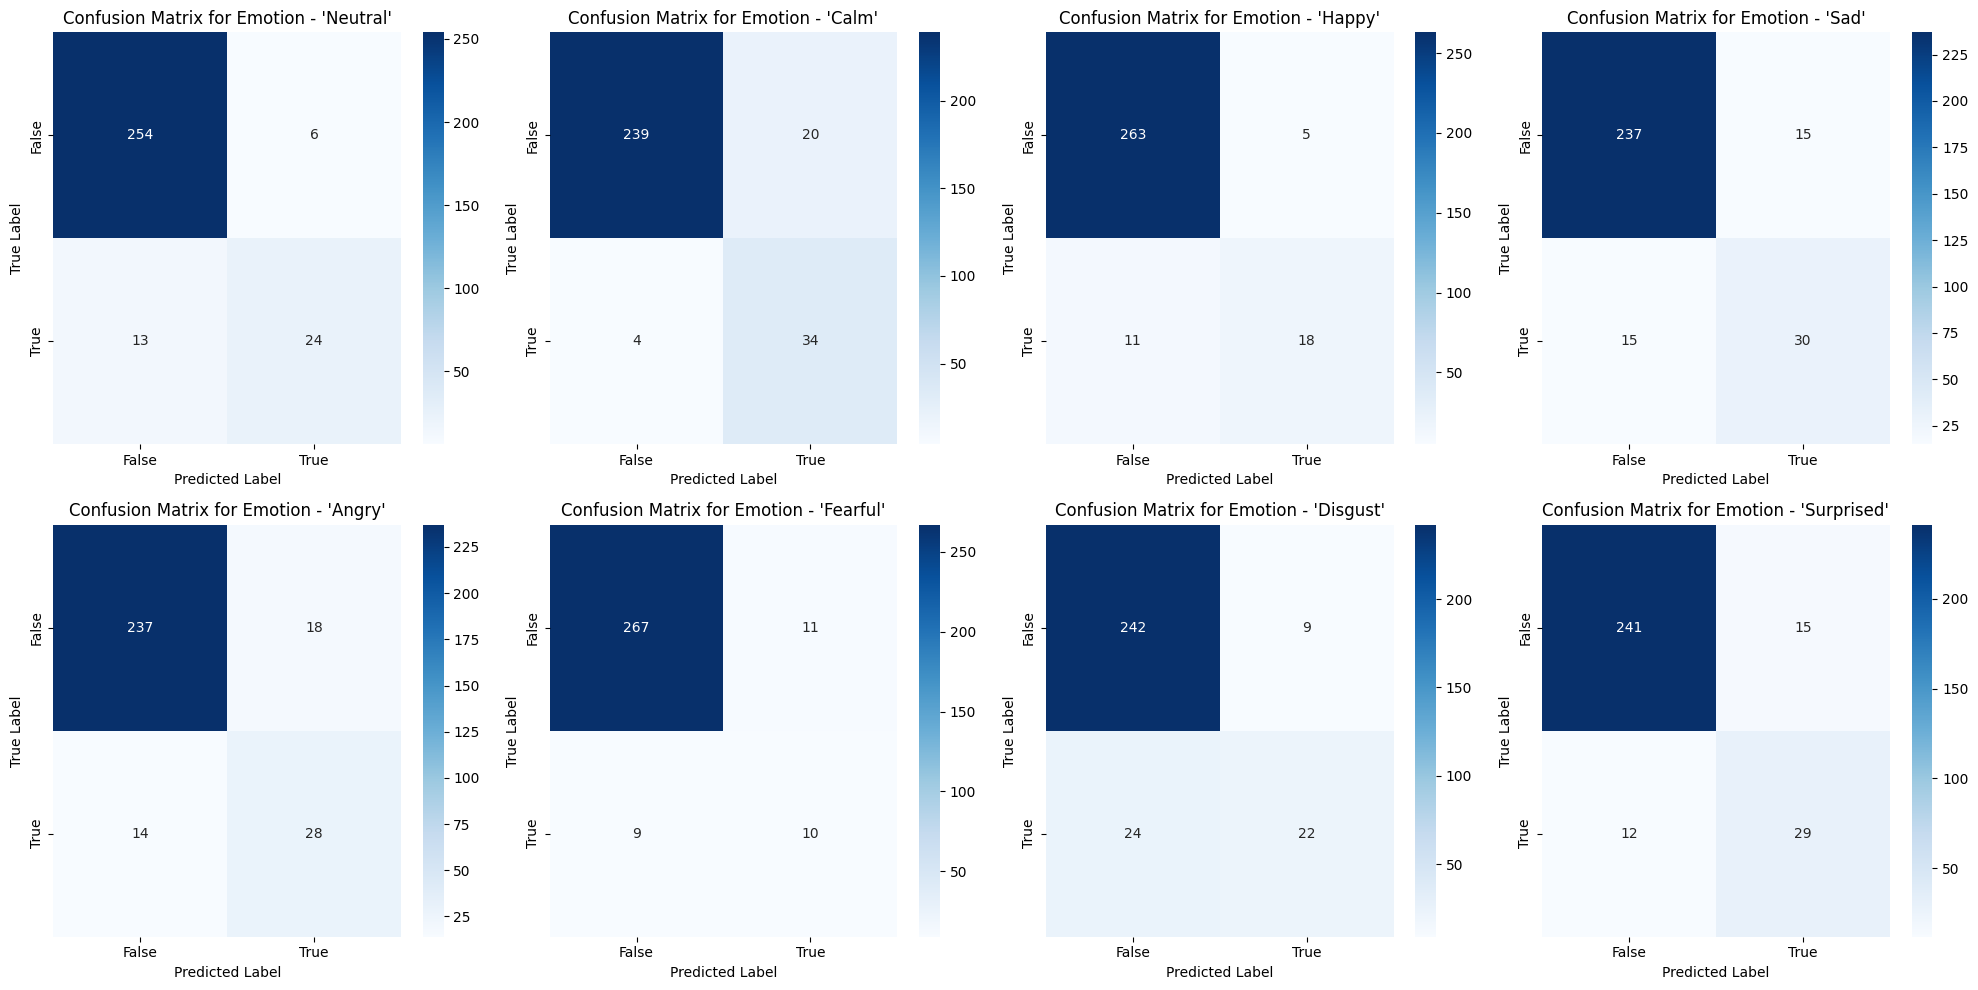

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, classification_report

# Make predictions on x_test_cnn
y_pred = model.predict(x_test)

# Convert the predictions and ground truth labels to binary matrices
y_pred_bin = (y_pred > 0.5).astype(int)
y_test_bin = y_test.astype(int)

# Calculate the confusion matrix
conf_mat = multilabel_confusion_matrix(y_test_bin, y_pred_bin)

# Define the class names
class_names = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

# Plot the confusion matrix for each class
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i in range(8):
    sns.heatmap(conf_mat[i], annot=True, cmap="Blues", fmt="d", xticklabels=["False", "True"], yticklabels=["False", "True"], ax=axs[i//4, i%4])
    axs[i//4, i%4].set_title(f"Confusion Matrix for Emotion - '{class_names[i]}'")
    axs[i//4, i%4].set_xlabel("Predicted Label")
    axs[i//4, i%4].set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        37
           1       0.63      0.89      0.74        38
           2       0.78      0.62      0.69        29
           3       0.67      0.67      0.67        45
           4       0.61      0.67      0.64        42
           5       0.48      0.53      0.50        19
           6       0.71      0.48      0.57        46
           7       0.66      0.71      0.68        41

   micro avg       0.66      0.66      0.66       297
   macro avg       0.67      0.65      0.65       297
weighted avg       0.68      0.66      0.66       297
 samples avg       0.66      0.66      0.66       297



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ***Precision, Recall, F1 Score***

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

precision, recall, f1_score, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

10/10 [==============================] - 0s 16ms/step
Precision: 0.6720403649899639
Recall: 0.6599326599326599
F1 score: 0.6573547844089452


### ***Sensitivity For Different Classes***

In [ ]:
y_pred=model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

TP = np.diag(cm)
FN = np.sum(cm, axis=1) - TP

sensitivity = TP / (TP + FN)

print("Sensitivity: ",sensitivity)

10/10 [==============================] - 0s 16ms/step
Sensitivity:  [0.64864865 0.89473684 0.62068966 0.66666667 0.66666667 0.57894737
 0.47826087 0.70731707]


### ***ROC-AUC Score & Curve***

#### Collective Score:

In [ ]:
from sklearn.metrics import roc_auc_score

# make predictions on test set
y_pred = model.predict(x_test)

# calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred, average='macro')

print('ROC-AUC score:', roc_auc)

10/10 [==============================] - 0s 16ms/step
ROC-AUC score: 0.9135321453153791


#### Graphical Representation of That:

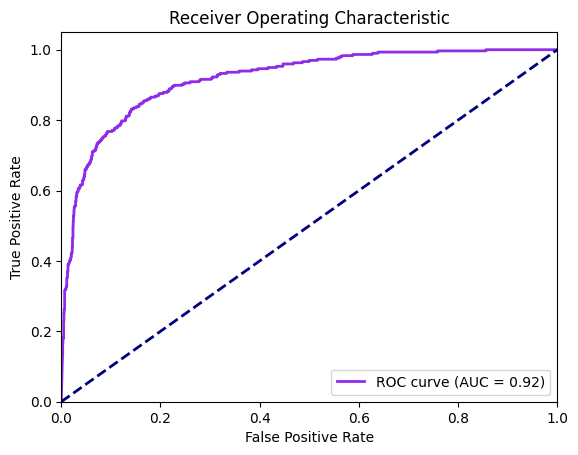

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='#902ce8', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Multiclass Version [Different ROCs for Different Classes]:

In [ ]:
n_classes = y_test.shape[1]
roc_auc_scores = []
for i in range(n_classes):
    roc_auc_scores.append(roc_auc_score(y_test[:, i], y_pred[:, i]))

In [ ]:
roc_auc_scores

[0.9308731808731809,
 0.9707376549481812,
 0.9068450849202265,
 0.8994708994708995,
 0.888422035480859,
 0.8968193865959864,
 0.898406374501992,
 0.9166825457317074]

#### Plotting That:

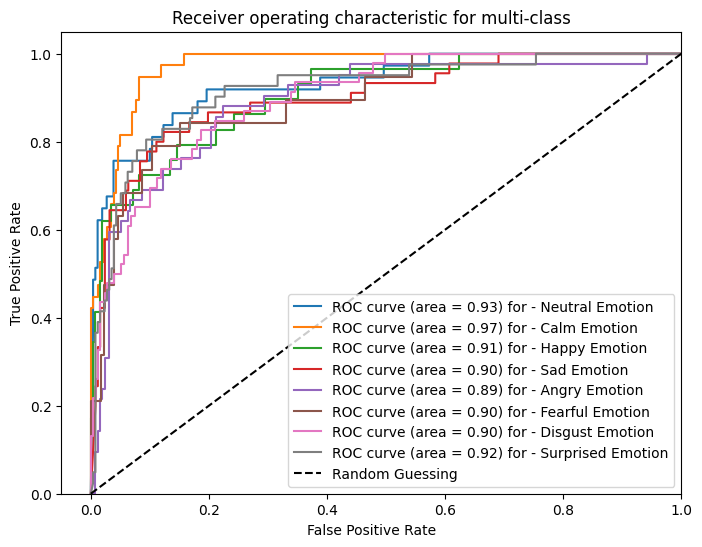

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

emotions = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]
# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for - %s Emotion' % (roc_auc[i], emotions[i]))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()